### Compare ROH from different runs

In [1]:
import numpy as np
import os  # For Saving to Folder
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colorbar as clb
import matplotlib.colors as cls
from matplotlib import gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
#from mpl_toolkits.basemap import Basemap

import socket
import os as os
import sys as sys
import multiprocessing as mp

### For Arial Font
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'   # Set the defaul
rcParams['font.sans-serif'] = ['Arial']  # Make sure to have the font installed (it is on cluster for Harald)

### To do lowess smoothing
#import statsmodels.api as sm
#lowess = sm.nonparametric.lowess

socket_name = socket.gethostname()
print(socket_name)
if socket_name == "VioletQueen":
    path = "/home/harald/git/HAPSBURG/"   # The Path on Harald's machine
elif socket_name.startswith("midway2"):
    print("Midway jnovmbre partition detected.")
    path = "/project2/jnovembre/hringbauer/HAPSBURG/"  # The Path on Midway Cluster
elif socket_name.startswith("Harald-Laptop"):
    print("Midway jnovmbre partition detected.")
    path = "/home/hringbauer/git/HAPSBURG/"  # The Path on Midway Cluster
else: 
    raise RuntimeWarning("Not compatible machine. Check!!")

os.chdir(path)  # Set the right Path (in line with Atom default)
print(os.getcwd()) # Show the current working directory. Should be HAPSBURG/Notebooks/ParallelRuns
print(f"CPU Count: {mp.cpu_count()}")

sys.path.append("./package/hapsburg") # Append Hapsburg Folder
from PackagesSupport.roh_expectations import Expected_Roh

midway2-0401.rcc.local
Midway jnovmbre partition detected.
/project2/jnovembre/hringbauer/HAPSBURG
CPU Count: 28


In [2]:
def scatter_2roh_csvs(df_both, figsize=(6,6), lim=[0,200],
                      cm1=4, cm2=0, ec="k", title="Olalde"):
    """Make Scatter Plot of two Runs"""
    plt.figure(figsize=figsize)
    ax=plt.gca()
    
    if cm2<=0:
        x =  df_both[f"sum_roh>{cm1}_x"]
        y =  df_both[f"sum_roh>{cm1}_y"]    
    else:
        x =  df_both[f"sum_roh>{cm1}_x"] - df_both[f"sum_roh>{cm2}_x"]
        y =  df_both[f"sum_roh>{cm1}_y"] - df_both[f"sum_roh>{cm2}_x"]
        
    ax.scatter(x, y,zorder=1, ec=ec)
    ax.plot(lim, lim, "gray", zorder=0)
    ax.set_title(f"Intersection {title}: {len(df_both)} Individuals")
    ax.set_xlabel(f"Sum ROH {cm1} - {cm2} cM (v42)")
    ax.set_ylabel(f"Sum ROH {cm1} - {cm2} (downloaded)")
    plt.show()

### Compare Additional v42 Individuals with original Runs

In [56]:
df1 = pd.read_csv("./Empirical/Eigenstrat/Reichall/final/combined_roh05_v42add.csv", sep="\t")   # The additional Runs
df2 = pd.read_csv("./Empirical/roh_all_inds_final.csv", sep="\t")   # The original Run
df_both = pd.merge(df1, df2, on="iid")

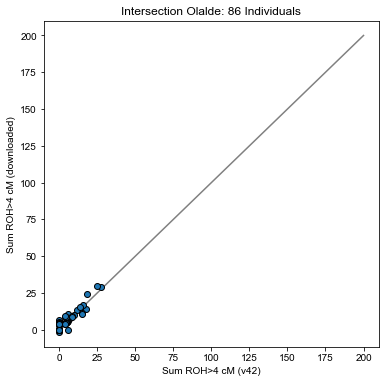

In [57]:
scatter_2roh_csvs(df_both, cm1=4, cm2=8)

### Do the Italian Individuals

In [58]:
df_a =  df2[df2["study"].str.contains("Antonio")].copy()
df_a["iid"] = [("R" + s[-1] + ".SG") for s in df_a["iid"].str.split("-")]

In [59]:
df_both = pd.merge(df1, df_a, on="iid")
len(df_both)

127

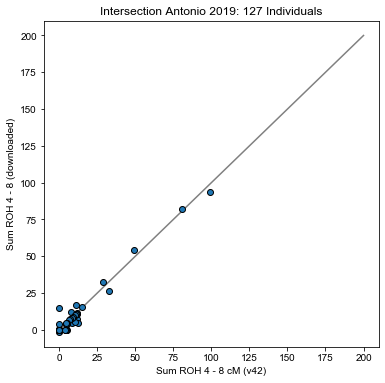

In [63]:
scatter_2roh_csvs(df_both,lim=[0,200], title="Antonio 2019",
                 cm1=4, cm2=8)

# Compare v42 and full previous run

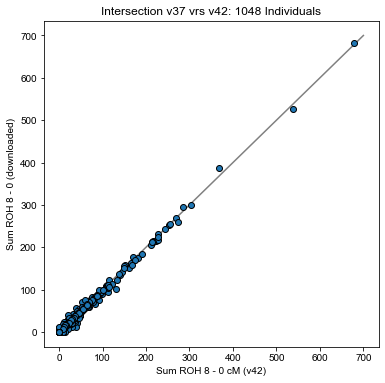

In [10]:
df1 = pd.read_csv("./Empirical/roh_all_inds.csv", sep="\t")   # The additional Runs
df2 = pd.read_csv("./Empirical/Eigenstrat/Reichall/combined_roh_v42.csv", sep="\t")   # The original Run
df_both = pd.merge(df1, df2, on="iid")

scatter_2roh_csvs(df_both,lim=[0,700], title="v37 vrs v42",
                 cm1=8, cm2=0)